<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

In [3]:
# 고객 데이터 불러오기
path = 'https://bit.ly/CustomersFile'
customers = pd.read_csv(path)
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [4]:
# 상품 데이터 불러오기
path = 'https://bit.ly/ProductsFile'
products = pd.read_csv(path)
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [5]:
path = 'https://bit.ly/OrdersFile'
orders = pd.read_csv(path)
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers)**

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [6]:
# 상위 10개의 데이터
customers.head(10)


,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시
5,c017531,2002-07-31,인천광역시 서구 완정로64번길,F,1970,인천광역시,서구
6,c017538,2002-07-31,경기도 과천시 관문로,F,1964,경기도,과천시
7,c017544,2002-07-31,경기도 고양시 일산동구 고풍로,M,1965,경기도,고양시
8,c017546,2002-07-31,경기도 부천시 원미구 중동로,F,1966,경기도,부천시
9,c017551,2002-07-31,경기도 안성시 현수2길,F,1962,경기도,안성시


In [7]:
# 하위 10개의 데이터
customers.tail(10)


,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
2233,c400312,2017-03-03,인천 동구 송미로,F,1975,인천광역시,동구
2234,c400470,2017-03-06,경기도 용인시 수지구 수풍로,F,1979,경기도,용인시
2235,c400665,2017-03-08,인천광역시 계양구 장제로,F,1964,인천광역시,계양구
2236,c400706,2017-03-09,서울 마포구 백범로,F,1981,서울특별시,마포구
2237,c400735,2017-03-09,경기도 남양주시 와부읍 덕소로,F,1970,경기도,남양주시
2238,c400937,2017-03-12,인천광역시 계양구 주부토로,F,1980,인천광역시,계양구
2239,c401555,2017-03-20,경기도 남양주시 별내면 청학로68번길,F,1981,경기도,남양주시
2240,c401584,2017-03-20,경기도 성남시 분당구 불정로,F,1979,경기도,성남시
2241,c402010,2017-03-25,경기도 성남시 분당구 판교원로82번길,F,1969,경기도,성남시
2242,c402634,2017-03-30,경기도 용인시 수지구 죽전로,F,1960,경기도,용인시


In [8]:
#열 정보 확인
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [9]:
# 결측치 확인
customers.isna().sum()

CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [10]:
# 범주형 데이터 고객 성별 분포 확인
customers['Gender'].value_counts()

F    2060
M     183
Name: Gender, dtype: int64

In [11]:
# 범주형 데이터 특별시,도별 고객 분포 확인
customers['Addr1'].value_counts()


경기도      1260
서울특별시     564
인천광역시     325
강원도        62
대구광역시       8
충청북도        8
충청남도        6
전라남도        3
광주광역시       3
경상북도        2
경상남도        1
전라북도        1
Name: Addr1, dtype: int64

In [12]:
# 범주형 데이터 시, 군별 고객 분포 확인
customers['Addr2'].value_counts()


안성시                 210
부천시                 147
용인시                 142
고양시                 117
성남시                 109
                   ... 
이천시                   1
경주시                   1
은평구진관20상림마을은평뉴타운      1
의정부시                  1
동두천시                  1
Name: Addr2, Length: 78, dtype: int64

In [13]:
#범주형 데이터 생년 고객분포
customers['BirthYear'].value_counts()


1973    122
1971    116
1974    107
1979    105
1970    104
       ... 
1939      2
1936      1
1994      1
1995      1
1999      1
Name: BirthYear, Length: 62, dtype: int64

**2) 상품 정보(products)**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [14]:
# 상위 10개 데이터
products.head(10)


,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1
5,p1006281,소보루빵,간식,빵,3
6,p1006411,통단팥빵,간식,빵,3
7,p1011291,낱개캔디,간식,사탕류,3
8,p1012581,깻잎,채소,잎채소,5
9,p1012641,상추,채소,잎채소,5


In [15]:
# 하위 10개 데이터
products.tail(10)


,ProductID,ProductName,Category,SubCategory,CategoryOrd
52,p1231011,초코아이스크림,유제품,아이스크림,4
53,p1233511,피망,채소,뿌리채소,5
54,p1234751,초코콘,유제품,아이스크림,4
55,p1235451,콘칩,간식,과자,3
56,p1237811,사과_대,과일,과수,2
57,p1246581,초코우유,유제품,우유,4
58,p1255281,딸기요거트,유제품,요거트,4
59,p1256521,부침용두부,반찬류,두부,1
60,p1284851,유기농우유,유제품,우유,4
61,p1299491,당근,채소,뿌리채소,5


In [16]:
# 열 정보 확인
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [17]:
# 결측치 확인
products.isna().sum()


ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

In [18]:
# 범주형 데이터 이름 분석
products['ProductName'].value_counts()


당근         3
감자칩        2
통단팥빵       1
콩나물        1
유기농우유      1
참외         1
사과_대       1
쌈모음        1
느타리버섯      1
브로컬리       1
부침용두부      1
새우깡        1
숙주나물       1
유부         1
백오이        1
우유1000     1
피망         1
초코아이스크림    1
두부_대       1
딸기요거트      1
고구마스틱      1
연두부        1
플레인요거트     1
팽이버섯       1
토마토        1
낱개캔디       1
팥아이스크림     1
콘칩         1
열무         1
두부_소       1
상추         1
순두부        1
포토아이스크림    1
청오이        1
양배출        1
사과아이스크림    1
시금치        1
무농약시금치     1
짱구         1
저지방우유      1
초코콘        1
깻잎         1
마늘         1
딸기_대       1
배아이스크림     1
양파         1
포도컵푸딩      1
무          1
소보루빵       1
딸기아이스크림    1
뿌셔뿌셔       1
딸기_소       1
감귤컵푸딩      1
사과_소       1
초코우유       1
파          1
애호박        1
우유200      1
부추         1
Name: ProductName, dtype: int64

In [19]:
# 범주형 데이터 대분류 분석
products['Category'].value_counts()


채소     23
유제품    14
간식     11
반찬류     8
과일      6
Name: Category, dtype: int64

In [20]:
# 범주형 데이터 소분류 분석
products['SubCategory'].value_counts()


뿌리채소     9
잎채소      8
아이스크림    7
두부       6
과자       6
우유       5
열매채소     4
과채       4
사탕류      3
요거트      2
과수       2
버섯       2
나물류      2
빵        2
Name: SubCategory, dtype: int64

**3) 주문 정보(orders)**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [21]:
# 상위 10개 데이터
orders.head(10)


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521
5,3,1,2016-01-02,p1012751,2,2700,c143548
6,4,1,2016-01-02,p1097821,1,1000,c256672
7,4,2,2016-01-02,p1178011,1,8800,c256672
8,5,1,2016-01-02,p1178011,1,8800,c260294
9,5,2,2016-01-02,p1194801,1,8200,c260294


In [22]:
# 하위 10개 데이터
orders.tail(10)


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
68829,74,2,2017-03-31,p1175481,1,1300,c221180
68830,74,3,2017-03-31,p1201601,1,2100,c221180
68831,75,1,2017-03-31,p1097821,1,1000,c255098
68832,75,2,2017-03-31,p1119071,1,1091,c255098
68833,75,3,2017-03-31,p1201601,1,2100,c255098
68834,76,1,2017-03-31,p1201601,1,2100,c302834
68835,77,1,2017-03-31,p1002841,1,10700,c343734
68836,78,1,2017-03-31,p1012761,1,1900,c354639
68837,79,1,2017-03-31,p1005891,1,1950,c394131
68838,79,2,2017-03-31,p1179241,1,2200,c394131


In [23]:
# 열정보 확인
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [24]:
# 결측치 확인
orders.isna().sum()


OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

In [70]:
# 범주형 데이터 고객정보 확인
orders.value_counts()


OrderID  Seq  OrderDate   ProductID  Qty  Amt    CustomerID
1        1    2016-01-02  p1030071   2    7900   c107853       1
49       2    2017-02-22  p1002841   2    26200  c274126       1
              2017-01-16  p1179241   1    2050   c092647       1
              2017-01-18  p1013251   1    3200   c177887       1
              2017-01-20  p1097821   4    3636   c038272       1
                                                              ..
25       1    2016-03-13  p1005771   1    1850   c168775       1
              2016-03-14  p1052661   2    2910   c324337       1
              2016-03-15  p1178011   1    8800   c140393       1
              2016-03-16  p1194801   1    6800   c347991       1
122      1    2016-02-06  p1133371   1    1000   c366727       1
Length: 68839, dtype: int64

## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.

In [8]:
# orders, products, customers 데이터 연결하여 sales 데이터프레임 생성
sales = pd.merge(orders, products, on='ProductID', how='inner')
sales = pd.merge(sales, customers, on='CustomerID', how='inner')


**2) 결과 확인**

In [26]:
sales.head()



,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,ProductName,Category,SubCategory,CategoryOrd,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,1,1,2016-01-02,p1030071,2,7900,c107853,토마토,과일,과채,2,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
1,55,1,2016-07-26,p1012581,1,1050,c107853,깻잎,채소,잎채소,5,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
2,44,8,2016-09-19,p1012581,1,1050,c107853,깻잎,채소,잎채소,5,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
3,36,2,2016-01-29,p1175481,1,1200,c107853,콩나물,반찬류,나물류,1,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시
4,54,1,2016-03-15,p1175481,1,1300,c107853,콩나물,반찬류,나물류,1,2008-07-11,경기도 안성시 비룡2길,M,1961,경기도,안성시


In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68839 entries, 0 to 68838
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       68839 non-null  int64 
 1   Seq           68839 non-null  int64 
 2   OrderDate     68839 non-null  object
 3   ProductID     68839 non-null  object
 4   Qty           68839 non-null  int64 
 5   Amt           68839 non-null  int64 
 6   CustomerID    68839 non-null  object
 7   ProductName   68839 non-null  object
 8   Category      68839 non-null  object
 9   SubCategory   68839 non-null  object
 10  CategoryOrd   68839 non-null  int64 
 11  RegisterDate  68839 non-null  object
 12  Address       68839 non-null  object
 13  Gender        68839 non-null  object
 14  BirthYear     68839 non-null  int64 
 15  Addr1         68839 non-null  object
 16  Addr2         68839 non-null  object
dtypes: int64(6), object(11)
memory usage: 9.5+ MB


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도) 등등

In [9]:
# Age : 나이별 분석을 위해
# OrderYear, OrderMonth : 년, 월 별 분석을 용이하게 하기위해
# 가격에 대한 분석을 위해
sales['Age'] = 2017 - sales['BirthYear']
sales['OrderYear'] = pd.to_datetime(sales['OrderDate']).dt.year
sales['OrderMonth'] = pd.to_datetime(sales['OrderDate']).dt.month
sales['Price'] = sales['Amt']/sales['Qty']

**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외 등등

In [10]:
# CategoryOrd 제거
# Address제거 : Add1,Add2 사용
# BirthYear제거 : Age 사용
# OrderDate제거 : Orderyear,OrderMonth 사용
sales.drop(['CategoryOrd', 'Address', 'BirthYear', 'ProductID', 'OrderDate'], axis=1, inplace=True)
sales.head()

,OrderID,Seq,Qty,Amt,CustomerID,ProductName,Category,SubCategory,RegisterDate,Gender,Addr1,Addr2,Age,OrderYear,OrderMonth,Price
0,1,1,2,7900,c107853,토마토,과일,과채,2008-07-11,M,경기도,안성시,56,2016,1,3950.0
1,55,1,1,1050,c107853,깻잎,채소,잎채소,2008-07-11,M,경기도,안성시,56,2016,7,1050.0
2,44,8,1,1050,c107853,깻잎,채소,잎채소,2008-07-11,M,경기도,안성시,56,2016,9,1050.0
3,36,2,1,1200,c107853,콩나물,반찬류,나물류,2008-07-11,M,경기도,안성시,56,2016,1,1200.0
4,54,1,1,1300,c107853,콩나물,반찬류,나물류,2008-07-11,M,경기도,안성시,56,2016,3,1300.0


In [11]:
# SubCategory 제거 : Category 사용
sales.drop('SubCategory', axis=1, inplace=True)

## 4.데이터 분석

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

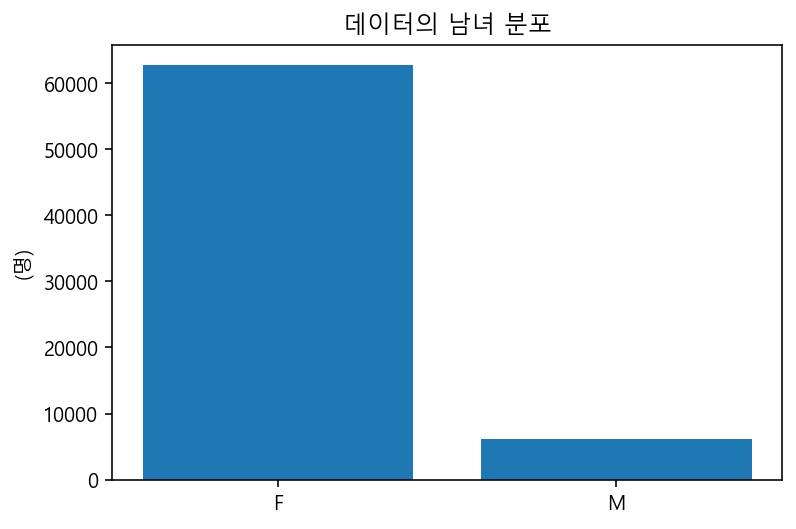

In [55]:
# 성별별 평균 판매액(데이터의 대부분이 여자)
tmp = sales.groupby(by='Gender', as_index=False)[['Amt']].count()
plt.title('데이터의 남녀 분포')
plt.bar(tmp['Gender'],tmp['Amt'])
plt.ylabel('(명)')
plt.show()

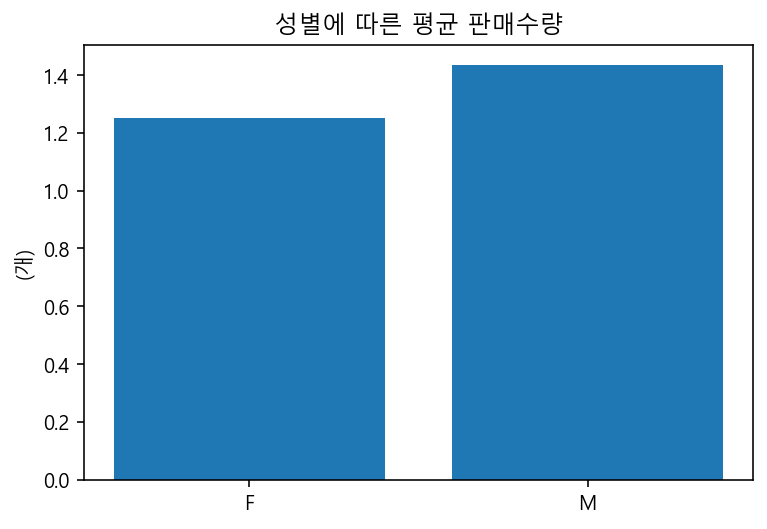

In [32]:
# 성별에 따른 평균 판매수량(데이터의 대부분이 여자)
tmp = sales.groupby(by='Gender', as_index=False)[['Qty']].mean()
plt.title('성별에 따른 평균 판매수량')
plt.bar(tmp['Gender'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()

**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

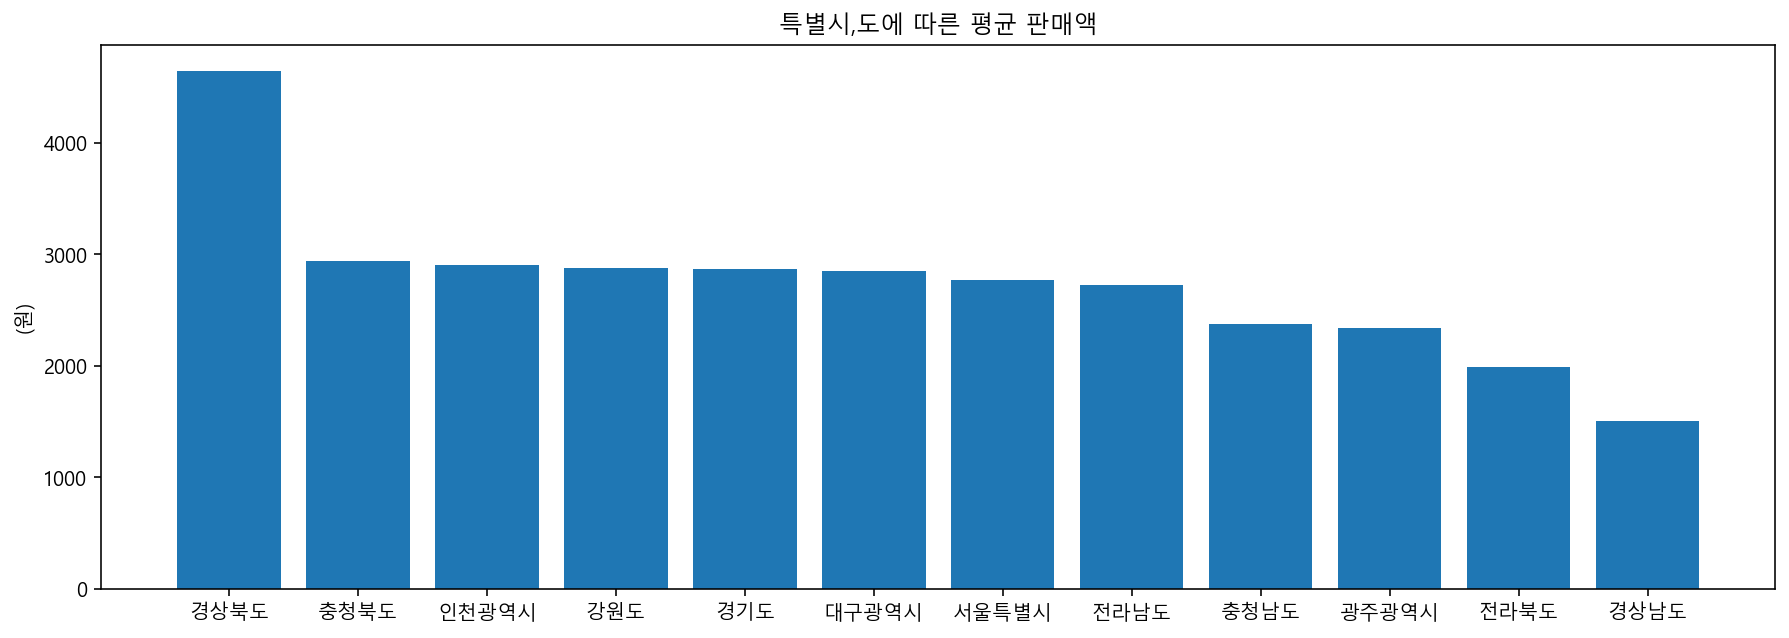

In [33]:
# 특별시, 도에 따른 평균 판매액
tmp = sales.groupby(by='Addr1', as_index=False)[['Amt']].mean()
tmp = tmp.sort_values(by='Amt', ascending=False)
plt.figure(figsize=(15,5))
plt.title('특별시,도에 따른 평균 판매액')
plt.bar(tmp['Addr1'],tmp['Amt'])
plt.ylabel('(원)')
plt.show()

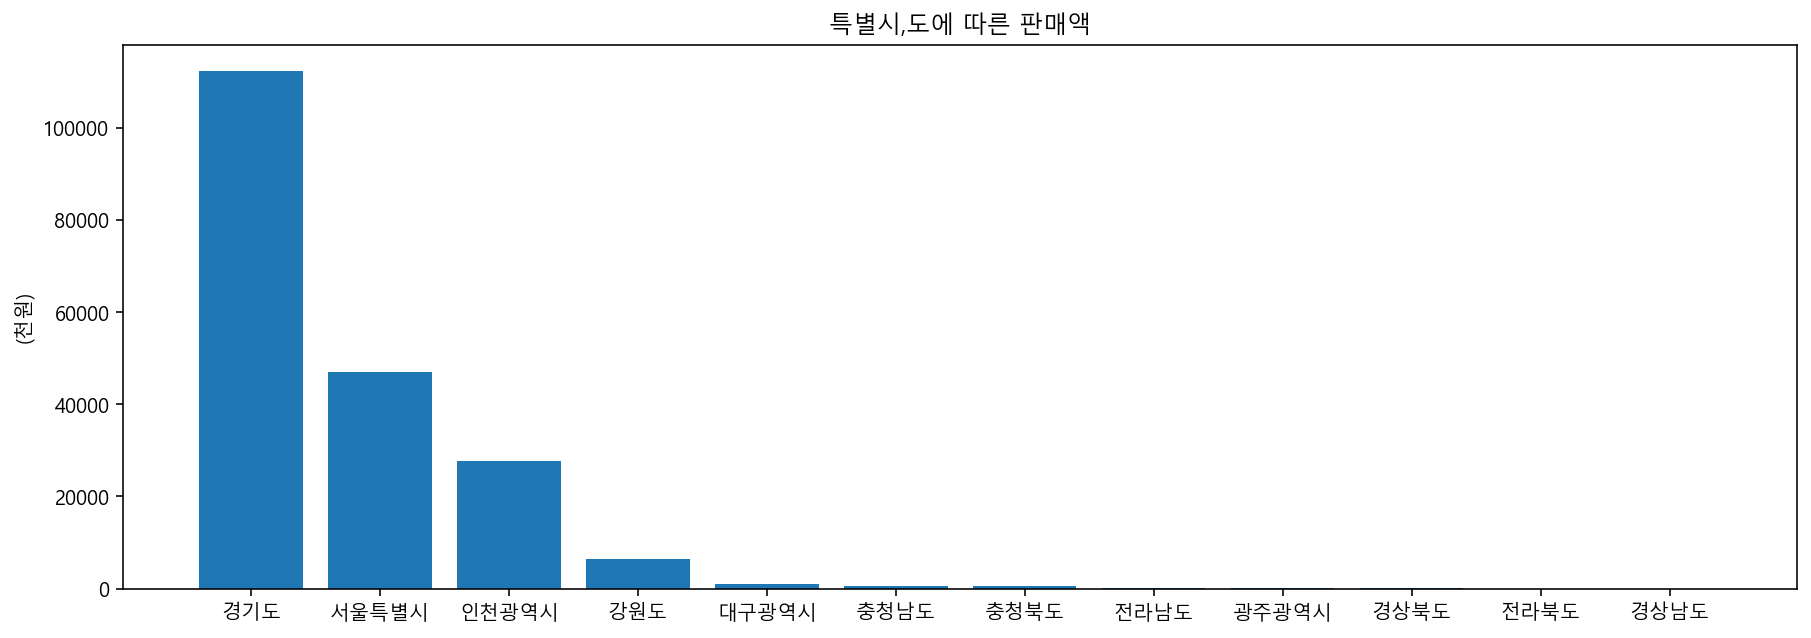

In [34]:
# 특별시, 도에 따른 판매액
tmp = sales.groupby(by='Addr1', as_index=False)[['Amt']].sum()
tmp = tmp.sort_values(by='Amt', ascending=False)
plt.figure(figsize=(15,5))
plt.title('특별시,도에 따른 판매액')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr1'],tmp['Amt']/1000)
plt.ylabel('(천원)')
plt.show()

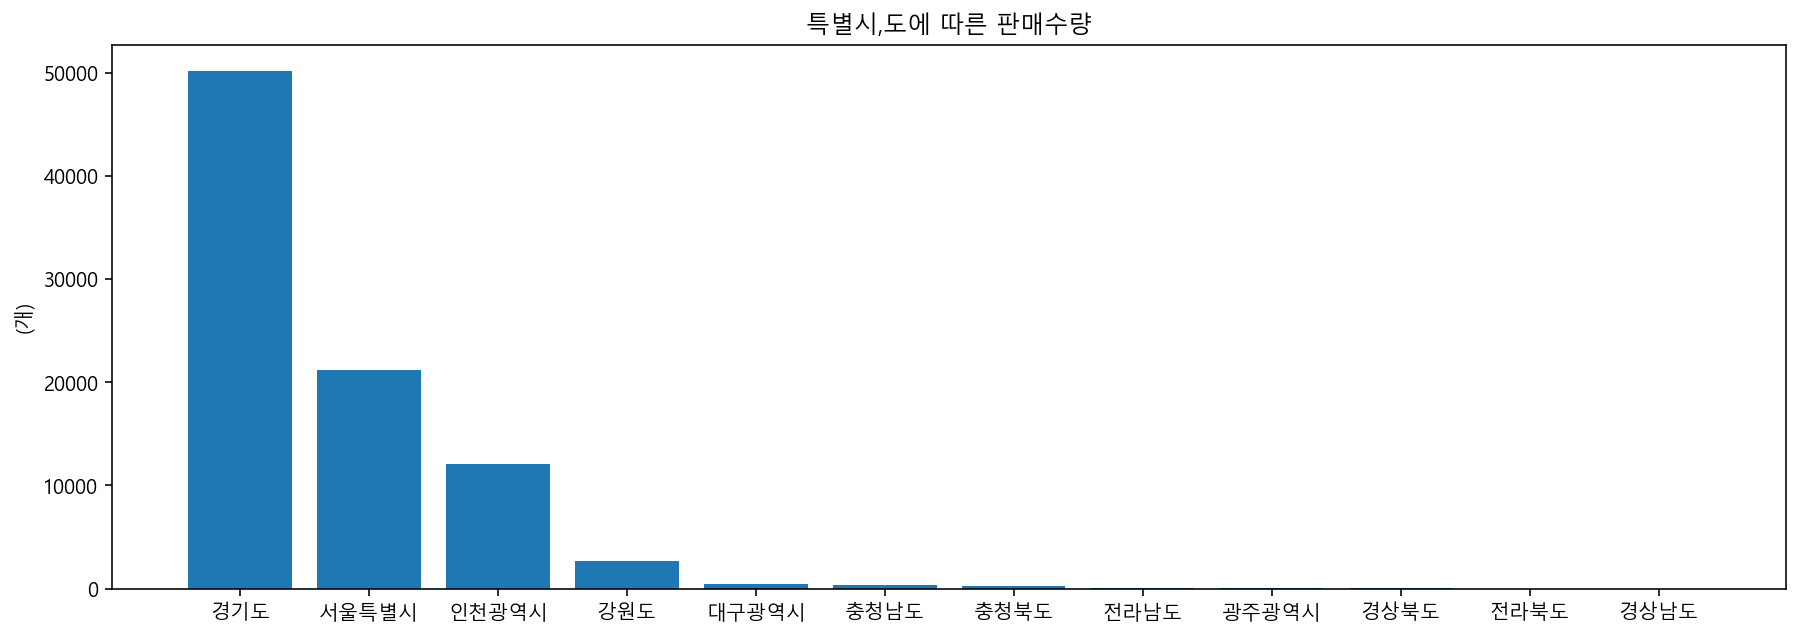

In [35]:
# 특별시, 도에 따른 판매수량
tmp = sales.groupby(by='Addr1', as_index=False)[['Qty']].sum()
tmp = tmp.sort_values(by='Qty', ascending=False)
plt.figure(figsize=(15,5))
plt.title('특별시,도에 따른 판매수량')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr1'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()

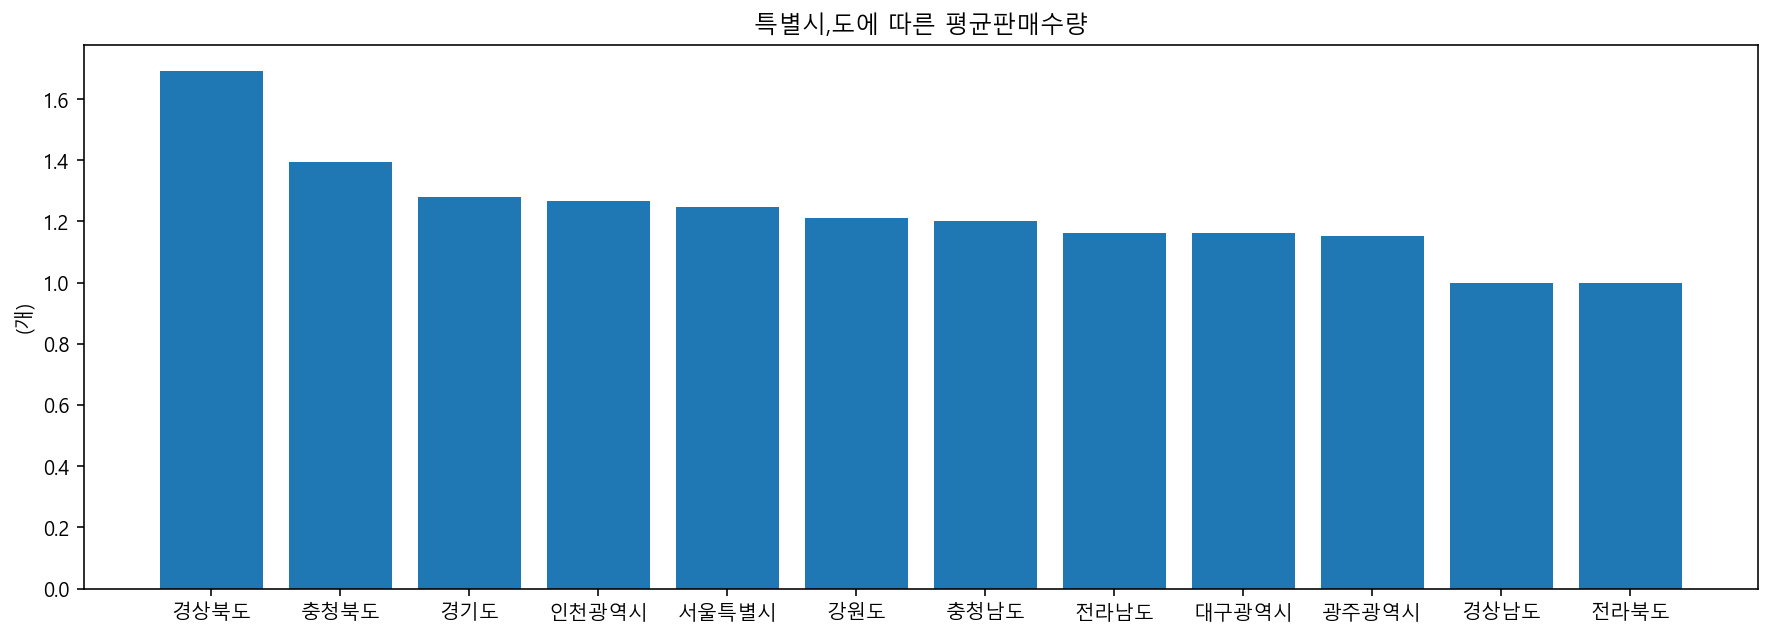

In [36]:
# 특별시, 도에 따른 평균판매수량
tmp = sales.groupby(by='Addr1', as_index=False)[['Qty']].mean()
tmp = tmp.sort_values(by='Qty', ascending=False)
plt.figure(figsize=(15,5))
plt.title('특별시,도에 따른 평균판매수량')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr1'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()

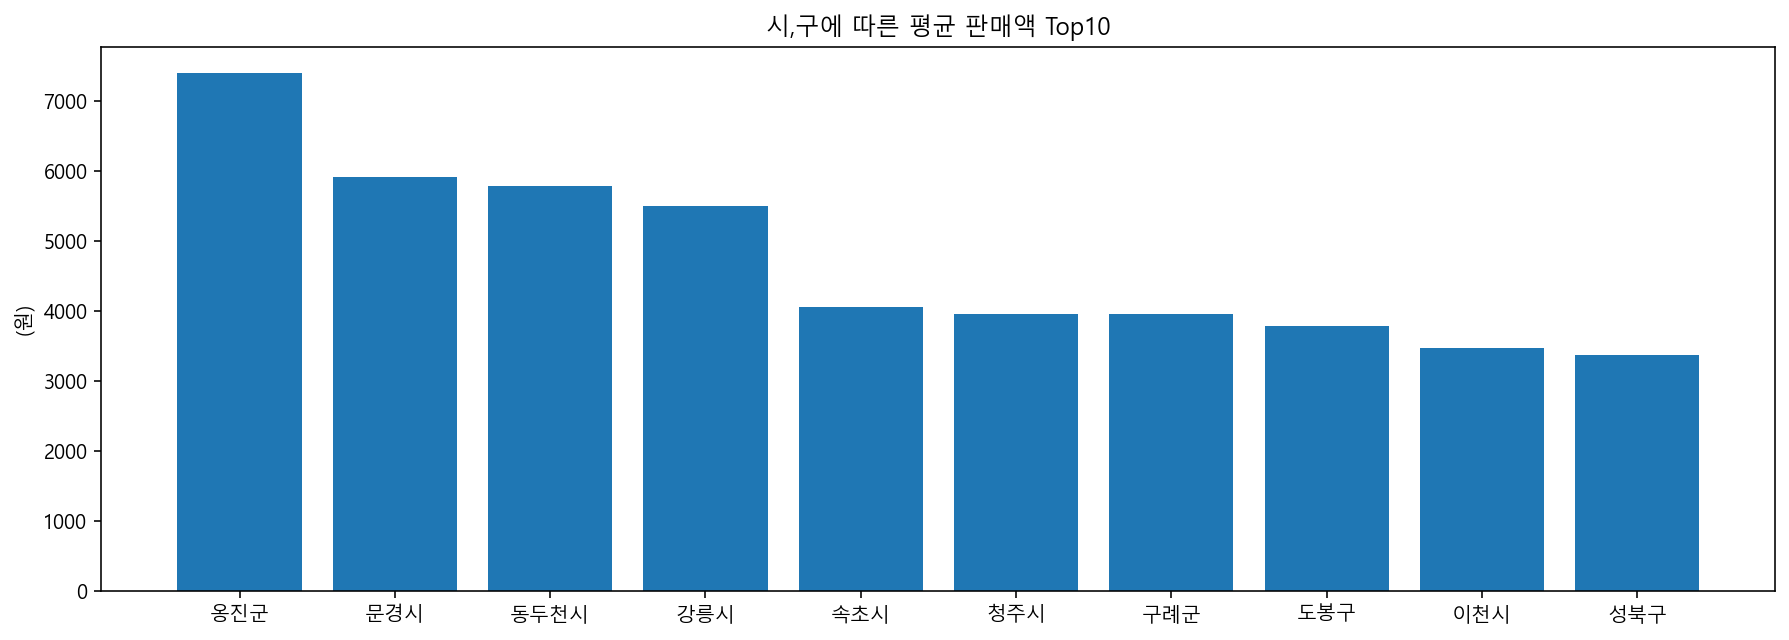

In [37]:
# 시, 구에 따른 평균 판매액 Top10
tmp = sales.groupby(by='Addr2', as_index=False)[['Amt']].mean()
tmp = tmp.sort_values(by='Amt', ascending=False).head(10)
plt.figure(figsize=(15,5))
plt.title('시,구에 따른 평균 판매액 Top10')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr2'],tmp['Amt'])
plt.ylabel('(원)')
plt.show()

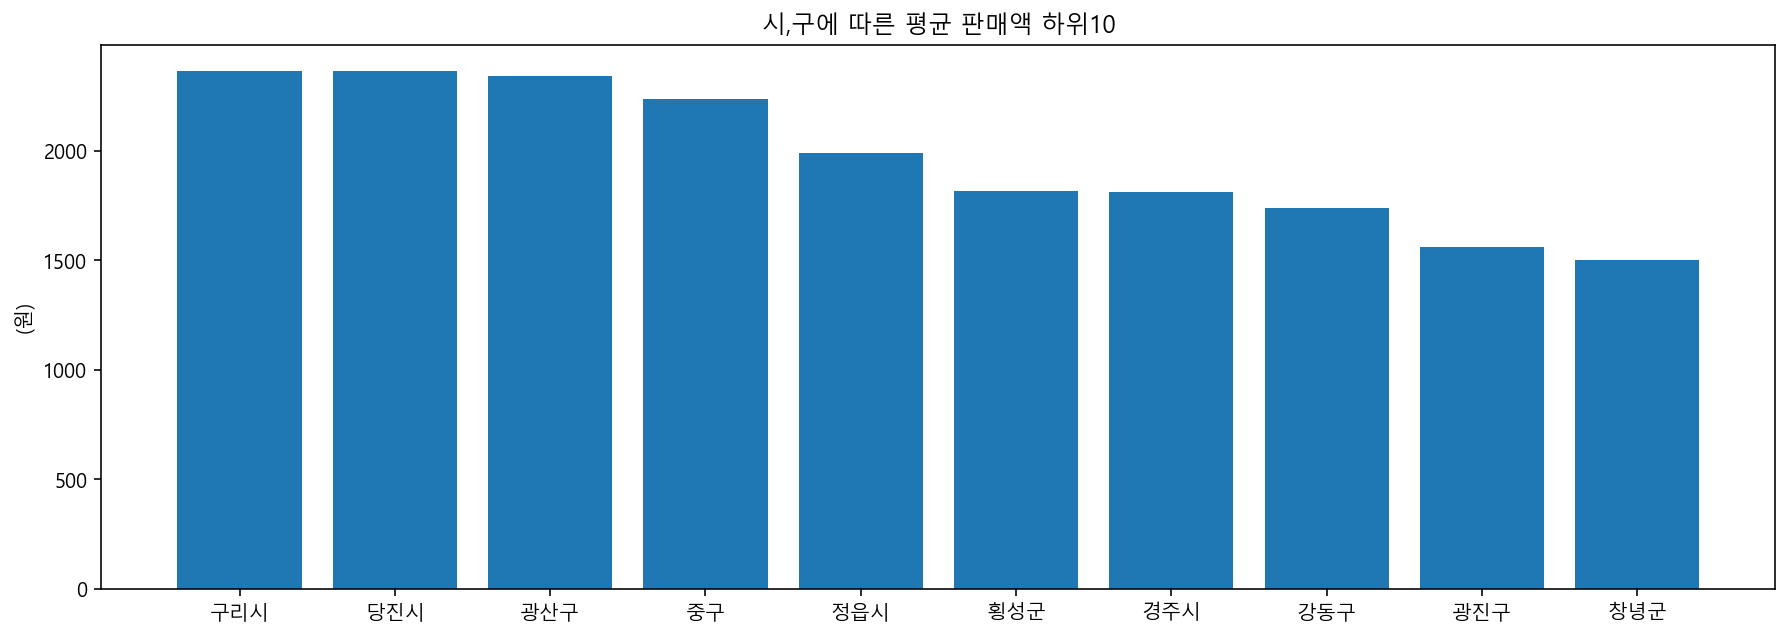

In [38]:
#시 구에 따른 평균 판매액 하위 10
tmp = sales.groupby(by='Addr2', as_index=False)[['Amt']].mean()
tmp = tmp.sort_values(by='Amt', ascending=False).tail(10)
plt.figure(figsize=(15,5))
plt.title('시,구에 따른 평균 판매액 하위10')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr2'],tmp['Amt'])
plt.ylabel('(원)')
plt.show()

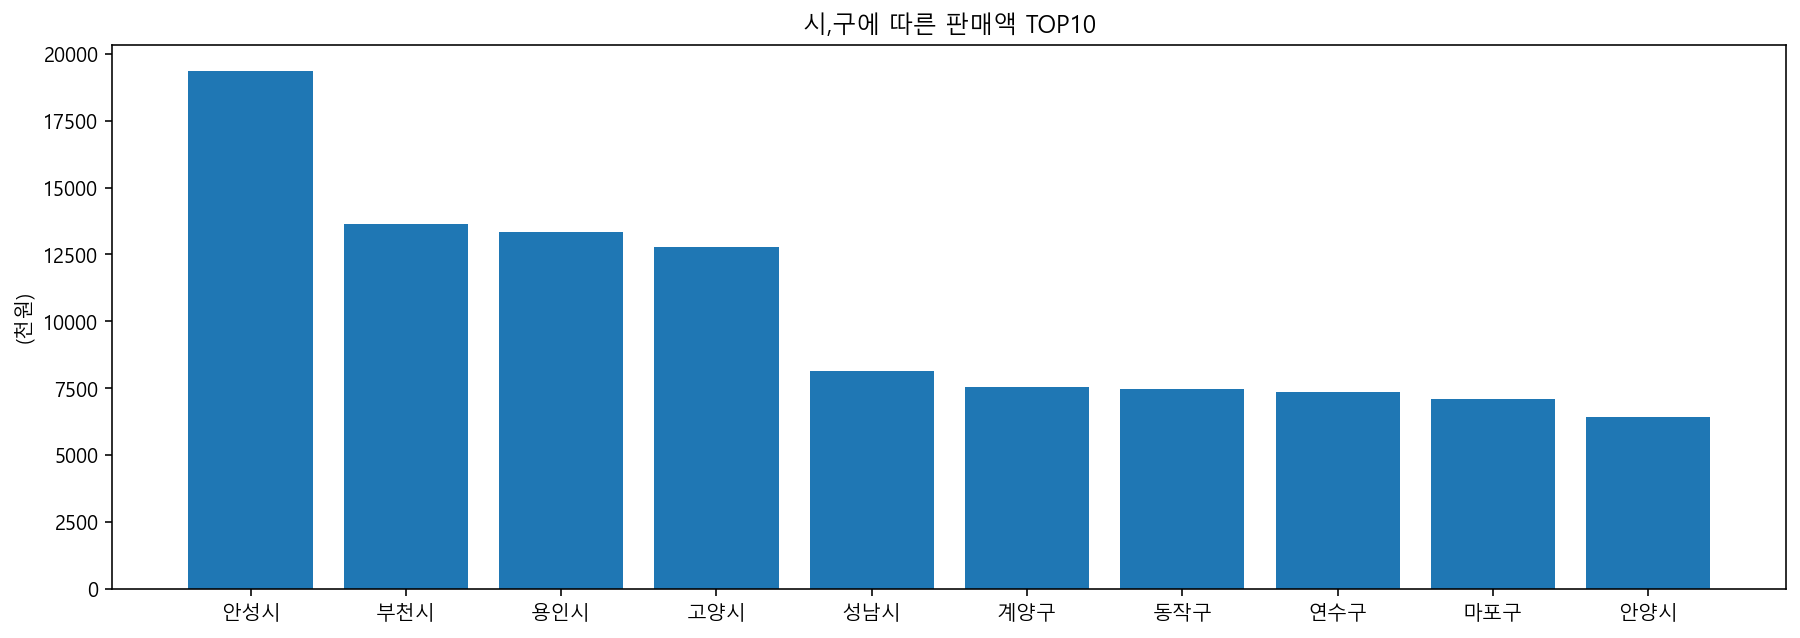

In [39]:
# 시, 군에 따른 누적 판매액 TOP10
tmp = sales.groupby(by='Addr2', as_index=False)[['Amt']].sum()
tmp = tmp.sort_values(by='Amt', ascending=False).head(10)
plt.figure(figsize=(15,5))
plt.title('시,구에 따른 판매액 TOP10')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr2'],tmp['Amt']/1000)
plt.ylabel('(천원)')
plt.show()

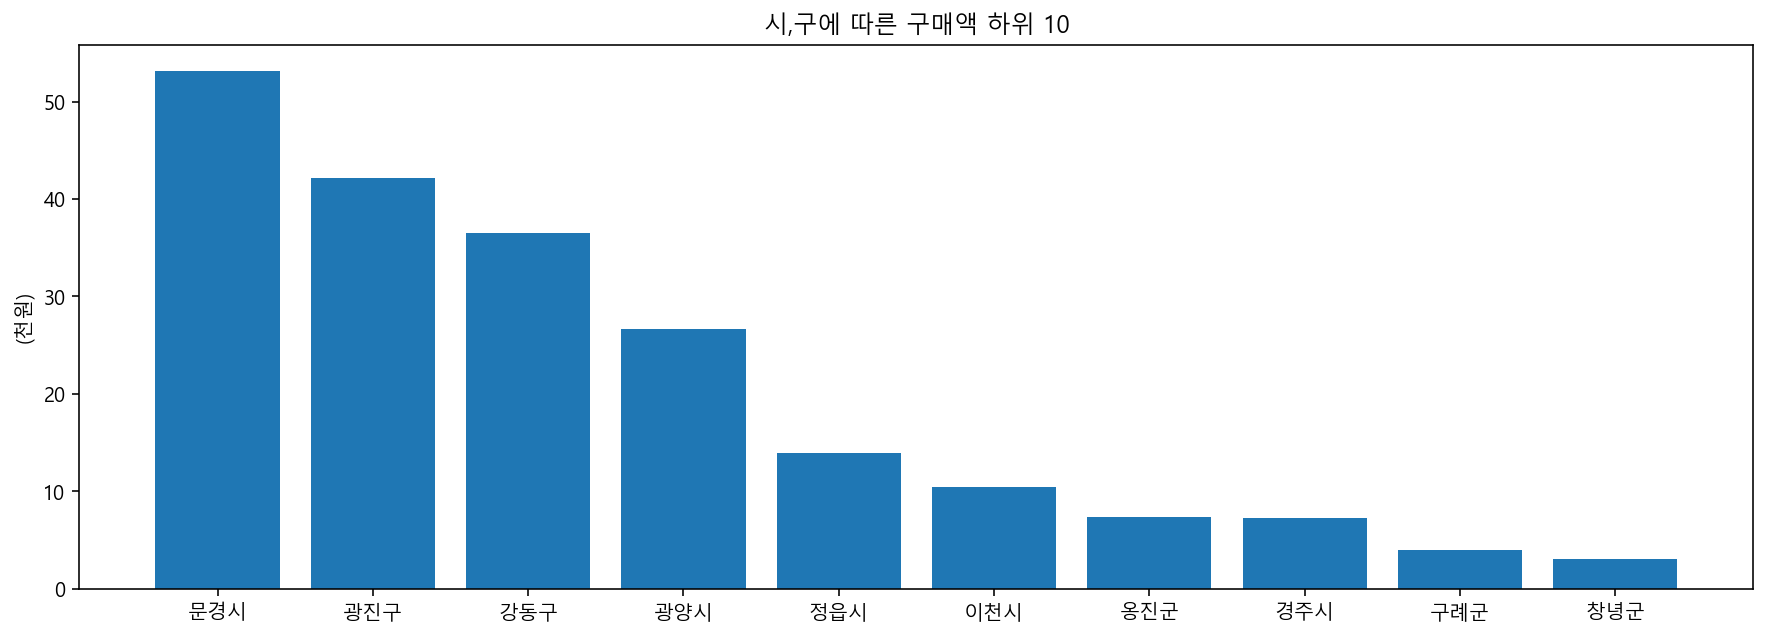

In [40]:
# 시, 군에 따른 누적 구매액 하위 10
tmp = sales.groupby(by='Addr2', as_index=False)[['Amt']].sum()
tmp = tmp.sort_values(by='Amt', ascending=False).tail(10)
plt.figure(figsize=(15,5))
plt.title('시,구에 따른 구매액 하위 10')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr2'],tmp['Amt']/1000)
plt.ylabel('(천원)')
plt.show()

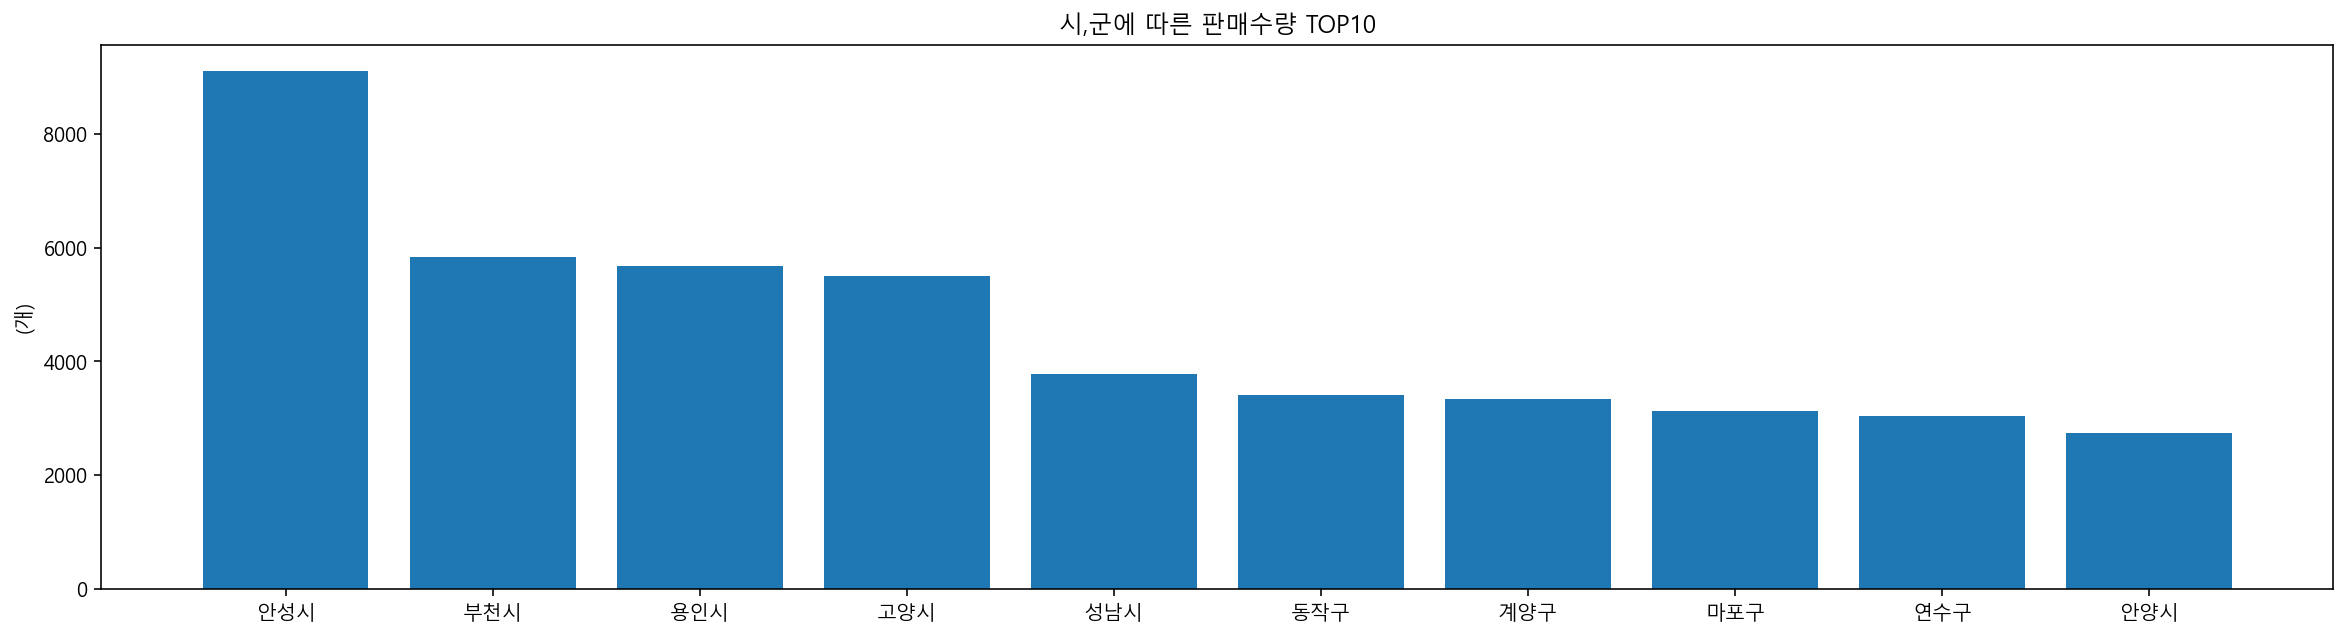

In [48]:
# 시 군에 따른 판매수량
tmp = sales.groupby(by='Addr2', as_index=False)[['Qty']].sum()
tmp = tmp.sort_values(by='Qty', ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.title('시,군에 따른 판매수량 TOP10')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr2'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()

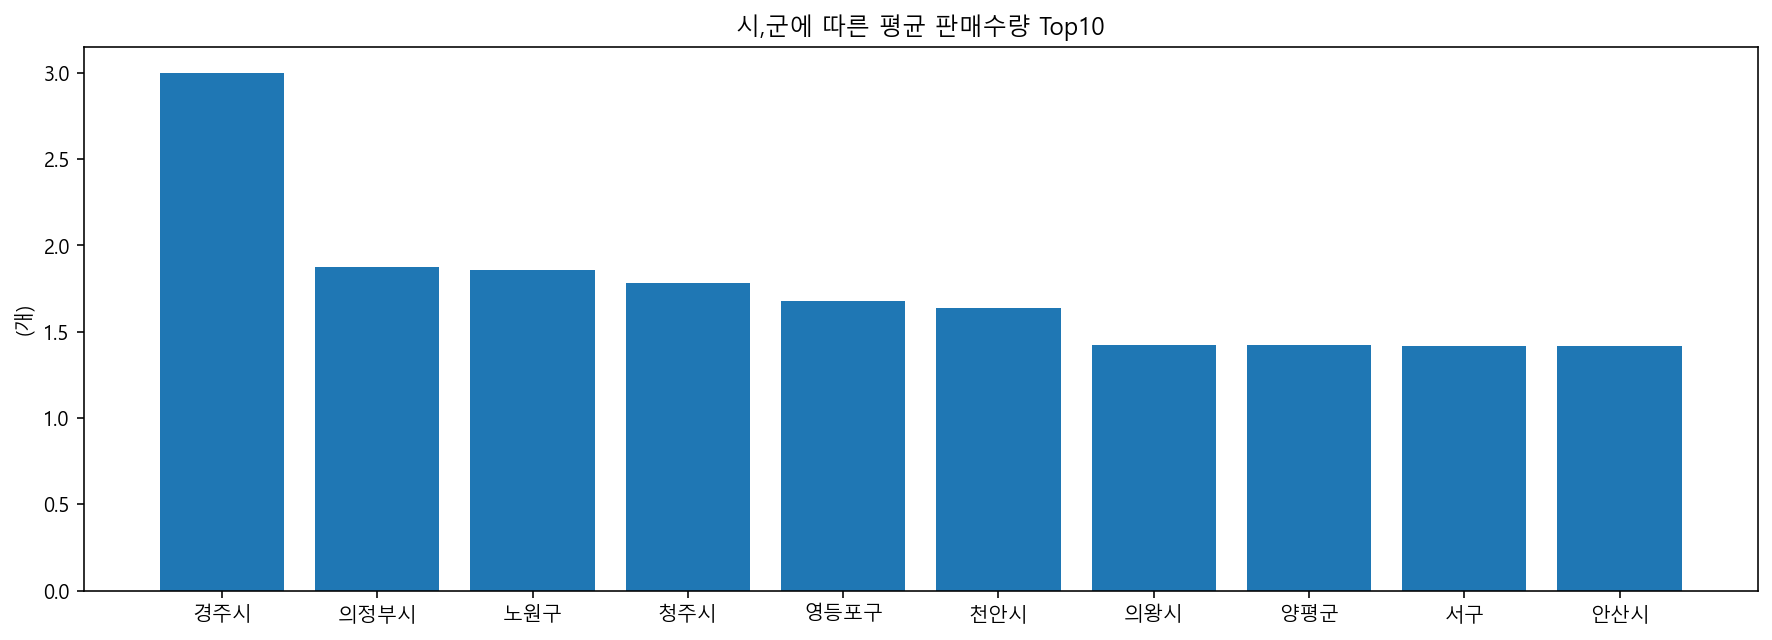

In [36]:
# 시 군에 따른 평균판매수량
tmp = sales.groupby(by='Addr2', as_index=False)[['Qty']].mean()
tmp = tmp.sort_values(by='Qty', ascending=False).head(10)
plt.figure(figsize=(15,5))
plt.title('시,군에 따른 평균 판매수량 Top10')
plt.ticklabel_format(axis='y', style='plain')
plt.bar(tmp['Addr2'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()

**3) 분류별 판매 현황**

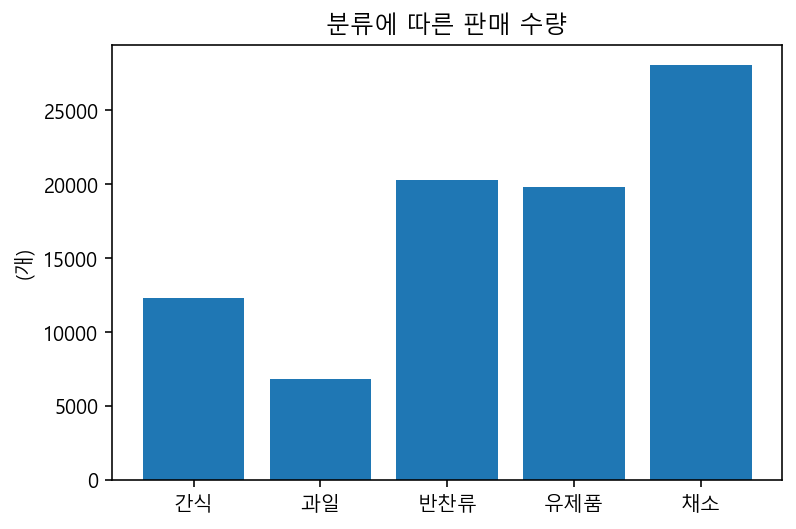

In [43]:
# 분류에 따른 판매 수량
tmp = sales.groupby(by='Category', as_index=False)[['Qty']].sum()
plt.title('분류에 따른 판매 수량')
plt.bar(tmp['Category'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()


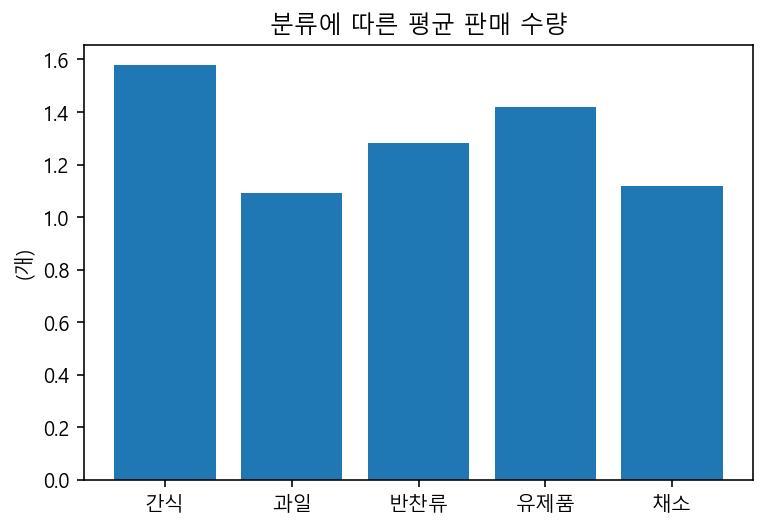

In [44]:
# 분류에 따른 평균 판매 수량
tmp = sales.groupby(by='Category', as_index=False)[['Qty']].mean()
plt.title('분류에 따른 평균 판매 수량')
plt.bar(tmp['Category'],tmp['Qty'])
plt.ylabel('(개)')
plt.show()

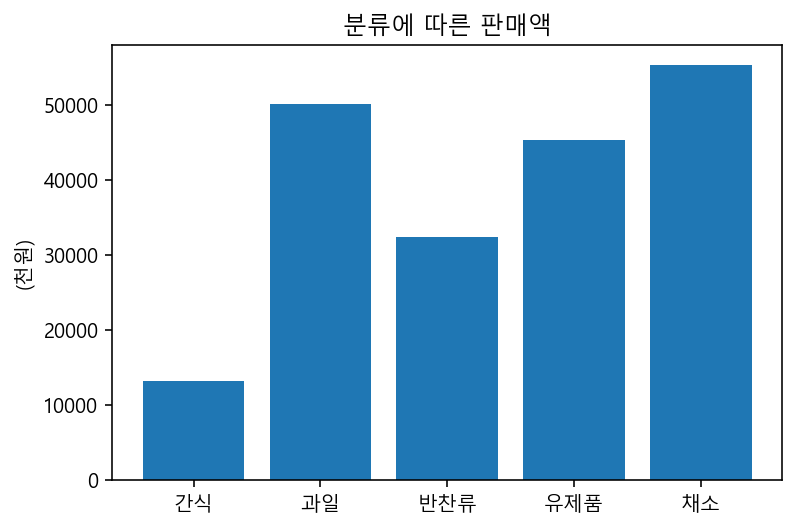

In [45]:
# 분류에 따른 판매액
tmp = sales.groupby(by='Category', as_index=False)[['Amt']].sum()
plt.title('분류에 따른 판매액')
plt.bar(tmp['Category'],tmp['Amt']/1000)
plt.ylabel('(천원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()


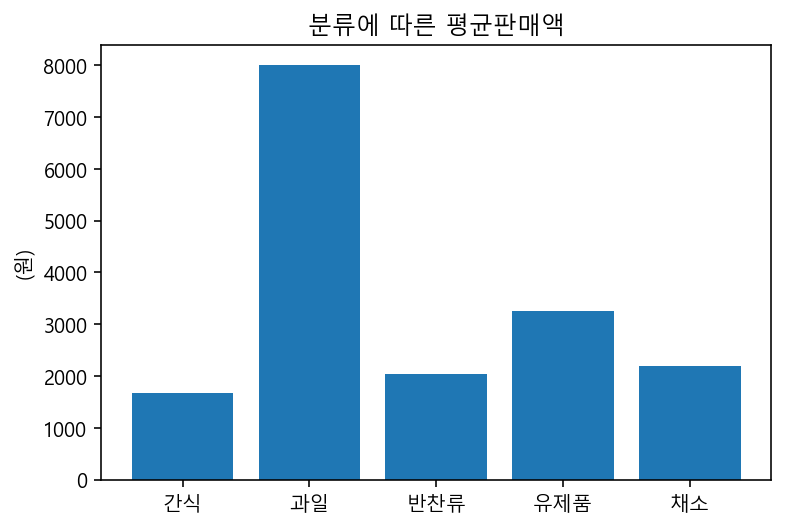

In [46]:
# 분류에 따른 평균판매액
tmp = sales.groupby(by='Category', as_index=False)[['Amt']].mean()
plt.title('분류에 따른 평균판매액')
plt.bar(tmp['Category'],tmp['Amt'])
plt.ylabel('(원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

**4) 주문년도별 판매현황**

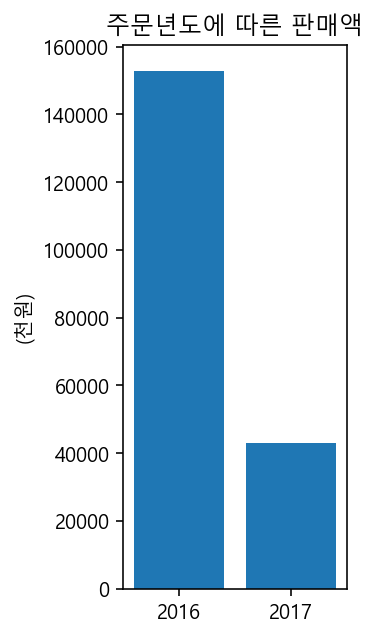

In [47]:
# 주문년도에 따른 판매액 (2017년은 3월까지의 데이터)
tmp = sales.groupby(by='OrderYear', as_index=False)[['Amt']].sum()
plt.figure(figsize=(2,5))
plt.title('주문년도에 따른 판매액')
plt.bar(tmp['OrderYear'],tmp['Amt']/1000)
plt.ylabel('(천원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()



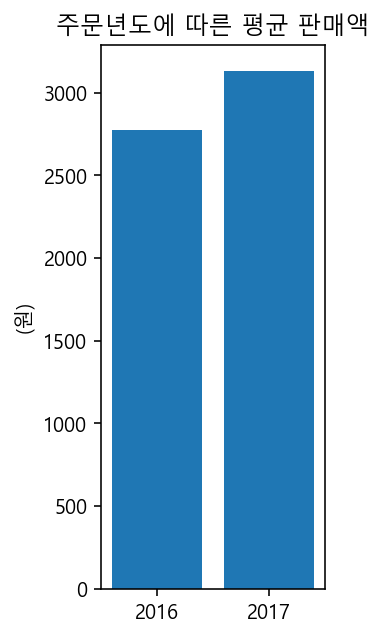

In [48]:
#주문 년도에 따른 평균 판매액
tmp = sales.groupby(by='OrderYear', as_index=False)[['Amt']].mean()
plt.figure(figsize=(2,5))
plt.title('주문년도에 따른 평균 판매액')
plt.bar(tmp['OrderYear'],tmp['Amt'])
plt.ylabel('(원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()


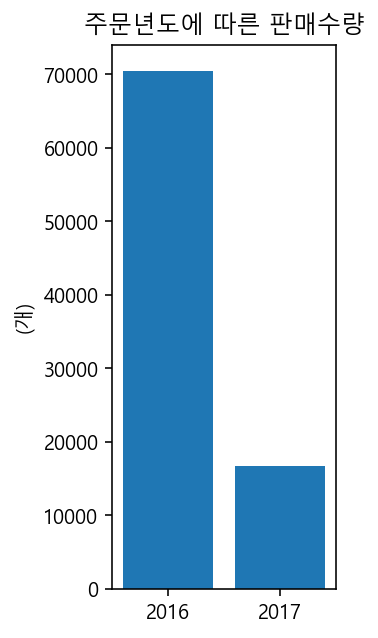

In [49]:
# 주문년도에 따른 판매 수량
tmp = sales.groupby(by='OrderYear', as_index=False)[['Qty']].sum()
plt.figure(figsize=(2,5))
plt.title('주문년도에 따른 판매수량')
plt.bar(tmp['OrderYear'],tmp['Qty'])
plt.ylabel('(개)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

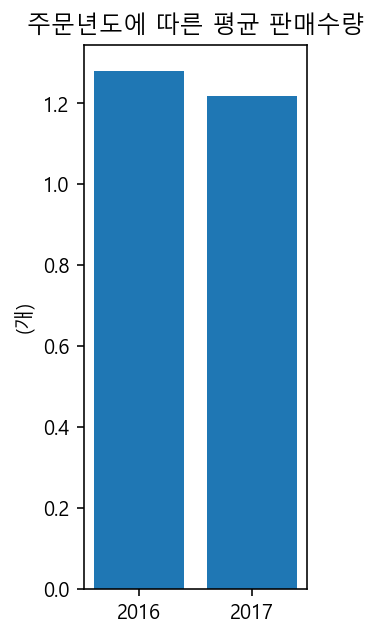

In [50]:
# 주문 년도에 따른 평균 판매 수량
tmp = sales.groupby(by='OrderYear', as_index=False)[['Qty']].mean()
plt.figure(figsize=(2,5))
plt.title('주문년도에 따른 평균 판매수량')
plt.bar(tmp['OrderYear'],tmp['Qty'])
plt.ylabel('(개)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()


**5) 2016년도 월별 판매현황**

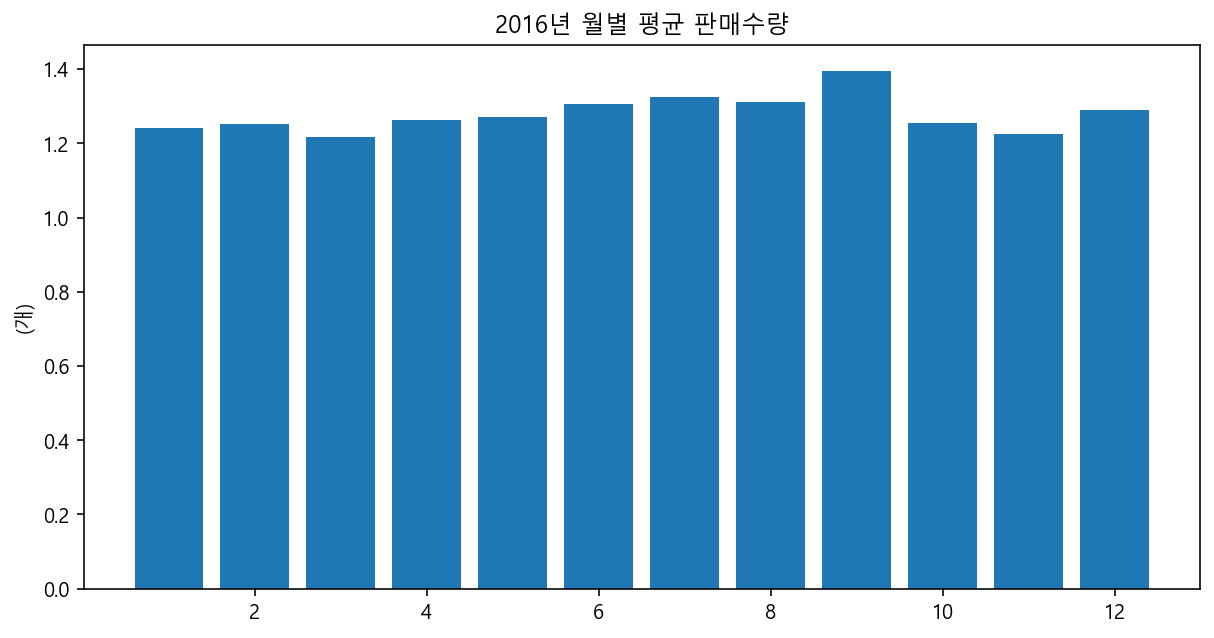

In [51]:
# 2016년 월별 평균 판매수량
tmp = sales[sales['OrderYear']==2016].groupby(by='OrderMonth', as_index=False)[['Qty']].mean()
plt.figure(figsize=(10,5))
plt.title('2016년 월별 평균 판매수량')
plt.bar(tmp['OrderMonth'],tmp['Qty'])
plt.ylabel('(개)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()




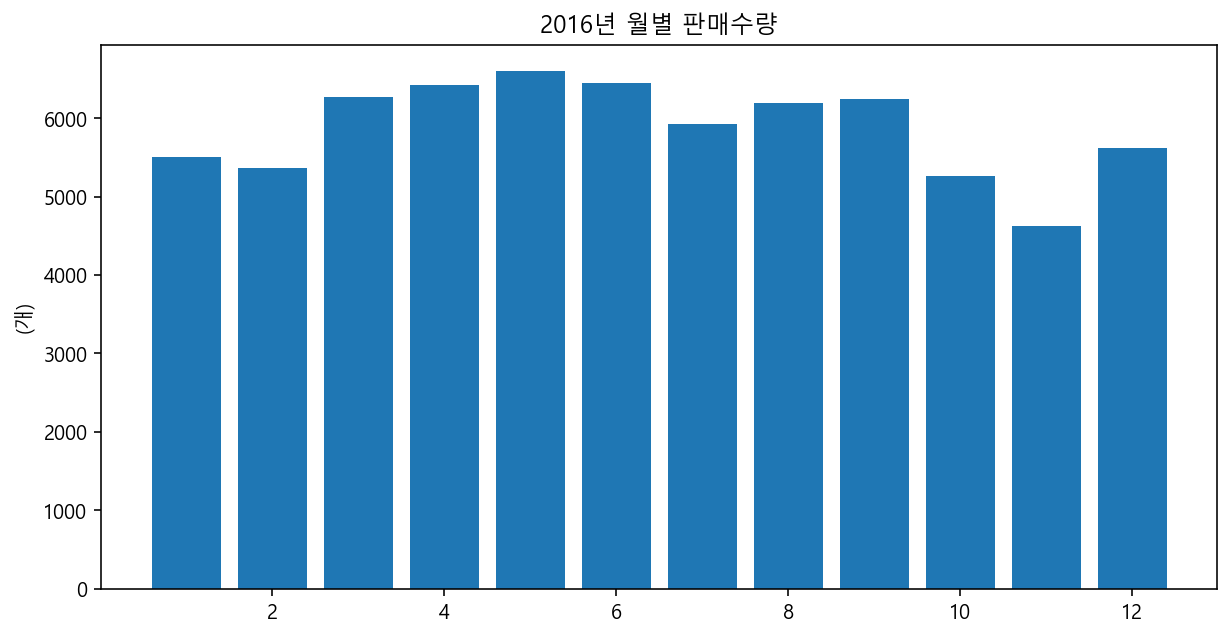

In [52]:
# 2016년 월별 판매수량
tmp = sales[sales['OrderYear']==2016].groupby(by='OrderMonth', as_index=False)[['Qty']].sum()
plt.figure(figsize=(10,5))
plt.title('2016년 월별 판매수량')
plt.bar(tmp['OrderMonth'],tmp['Qty'])
plt.ylabel('(개)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

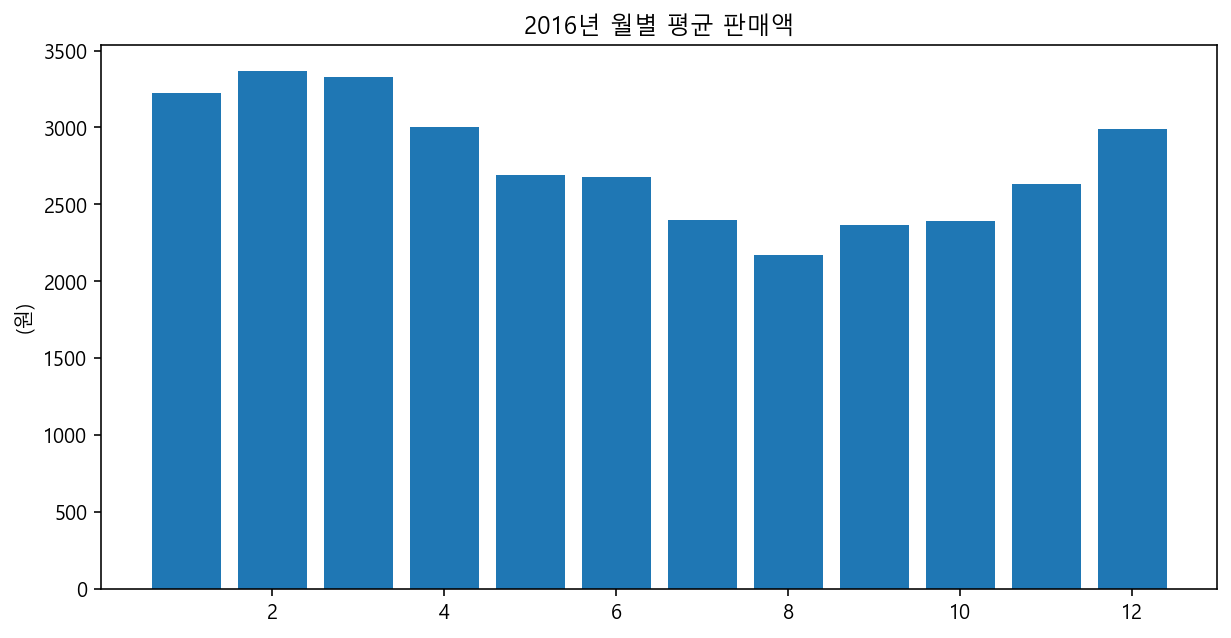

In [53]:
# 2016년 월별 평균 판매액
tmp = sales[sales['OrderYear']==2016].groupby(by='OrderMonth', as_index=False)[['Amt']].mean()
plt.figure(figsize=(10,5))
plt.title('2016년 월별 평균 판매액')
plt.bar(tmp['OrderMonth'],tmp['Amt'])
plt.ylabel('(원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

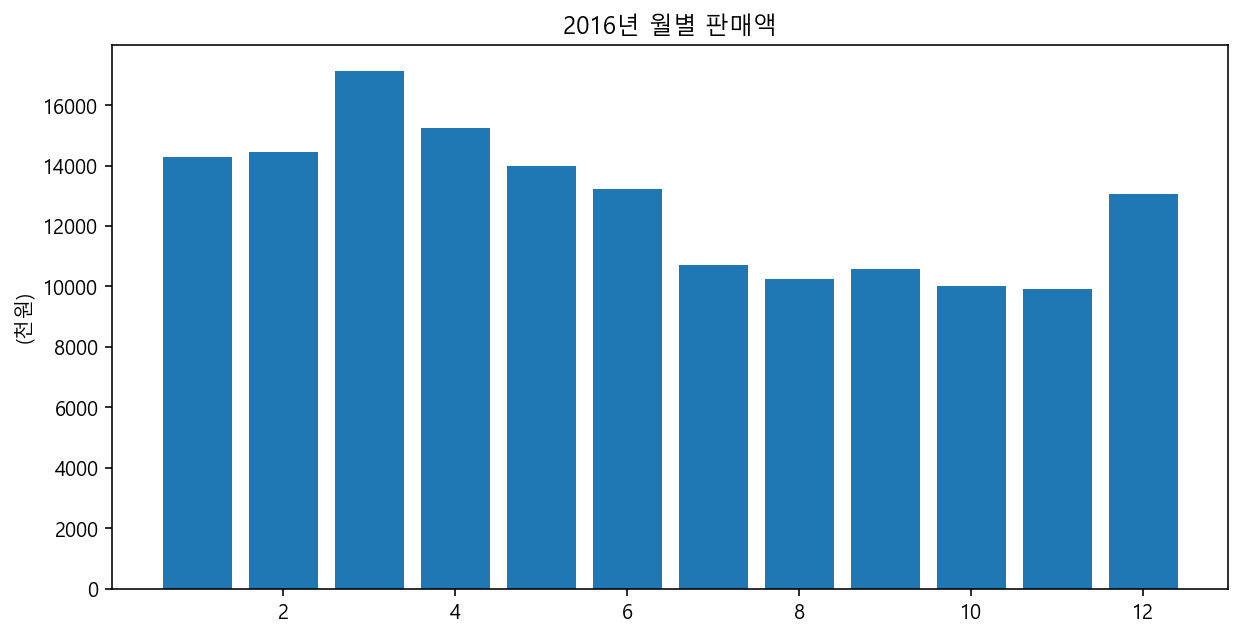

In [54]:
# 2016년 월별 판매액
tmp = sales[sales['OrderYear']==2016].groupby(by='OrderMonth', as_index=False)[['Amt']].sum()
plt.figure(figsize=(10,5))
plt.title('2016년 월별 판매액')
plt.bar(tmp['OrderMonth'],tmp['Amt']/1000)
plt.ylabel('(천원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

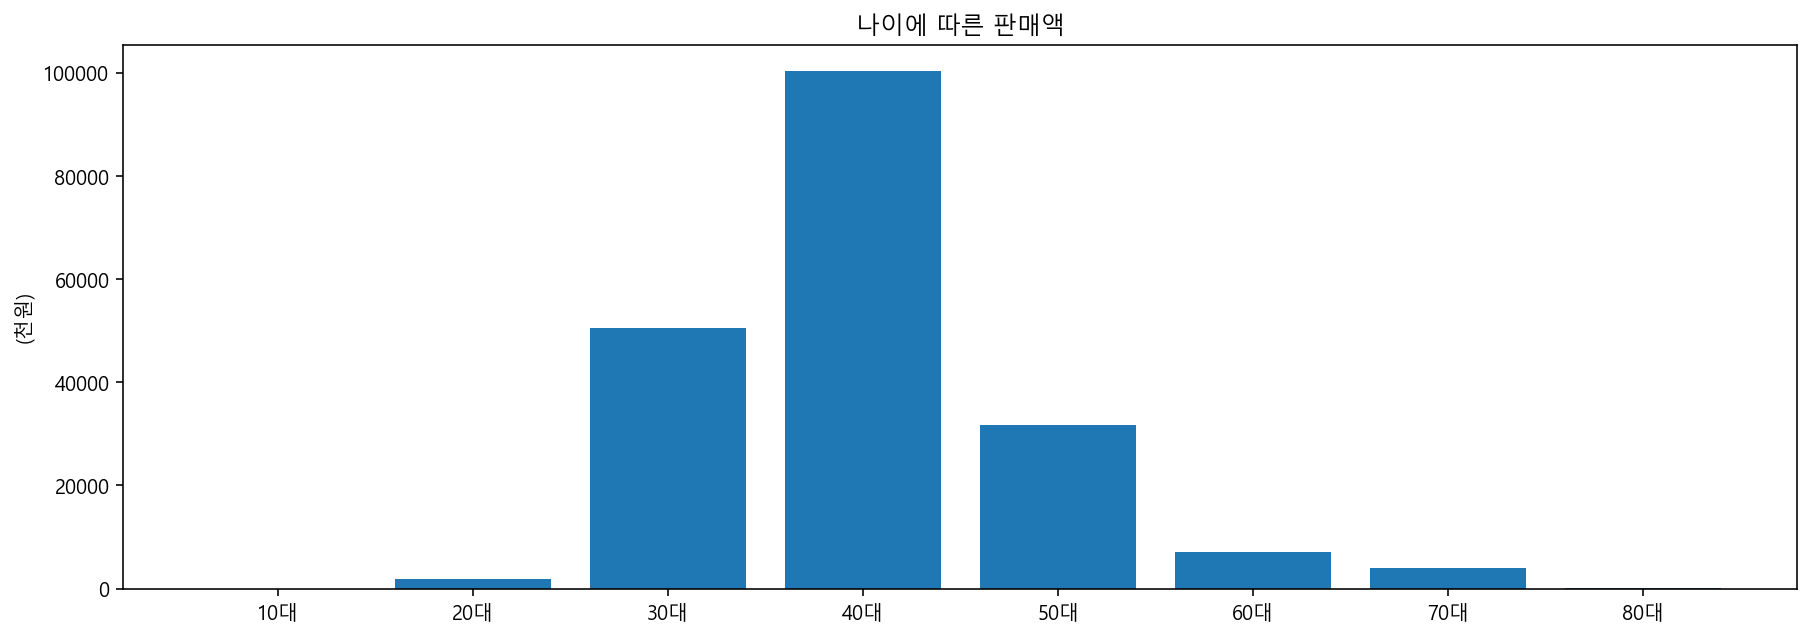

In [49]:
tmp = sales.groupby(by='Age1', as_index=False)[['Amt']].sum()
plt.figure(figsize=(15,5))
plt.title('나이에 따른 판매액')
plt.bar(tmp['Age1'],tmp['Amt']/1000)
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('(천원)')
plt.show()

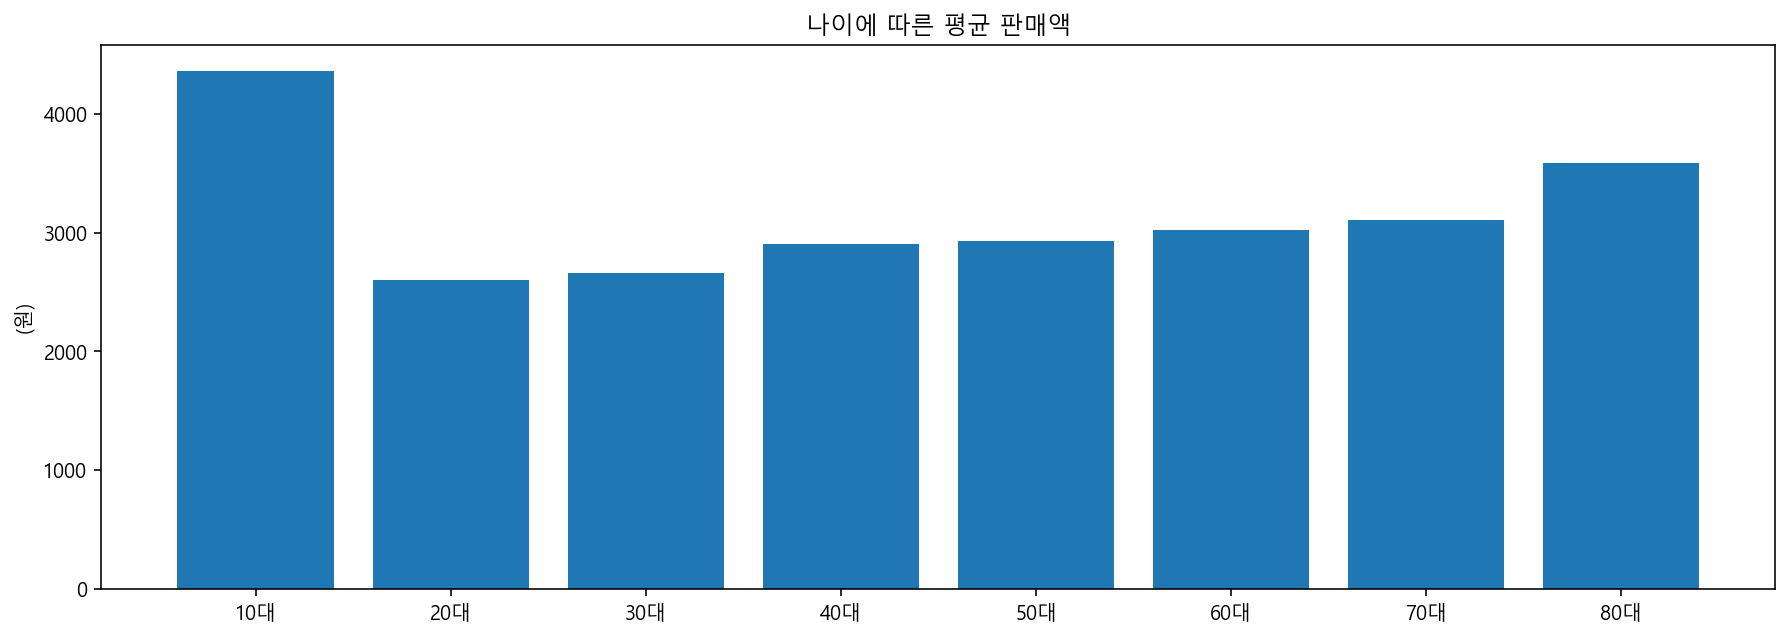

In [32]:
tmp = sales.groupby(by='Age1', as_index=False)[['Amt']].mean()
plt.figure(figsize=(15,5))
plt.title('나이에 따른 평균 판매액')
plt.bar(tmp['Age1'],tmp['Amt'])
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('(원)')
plt.show()

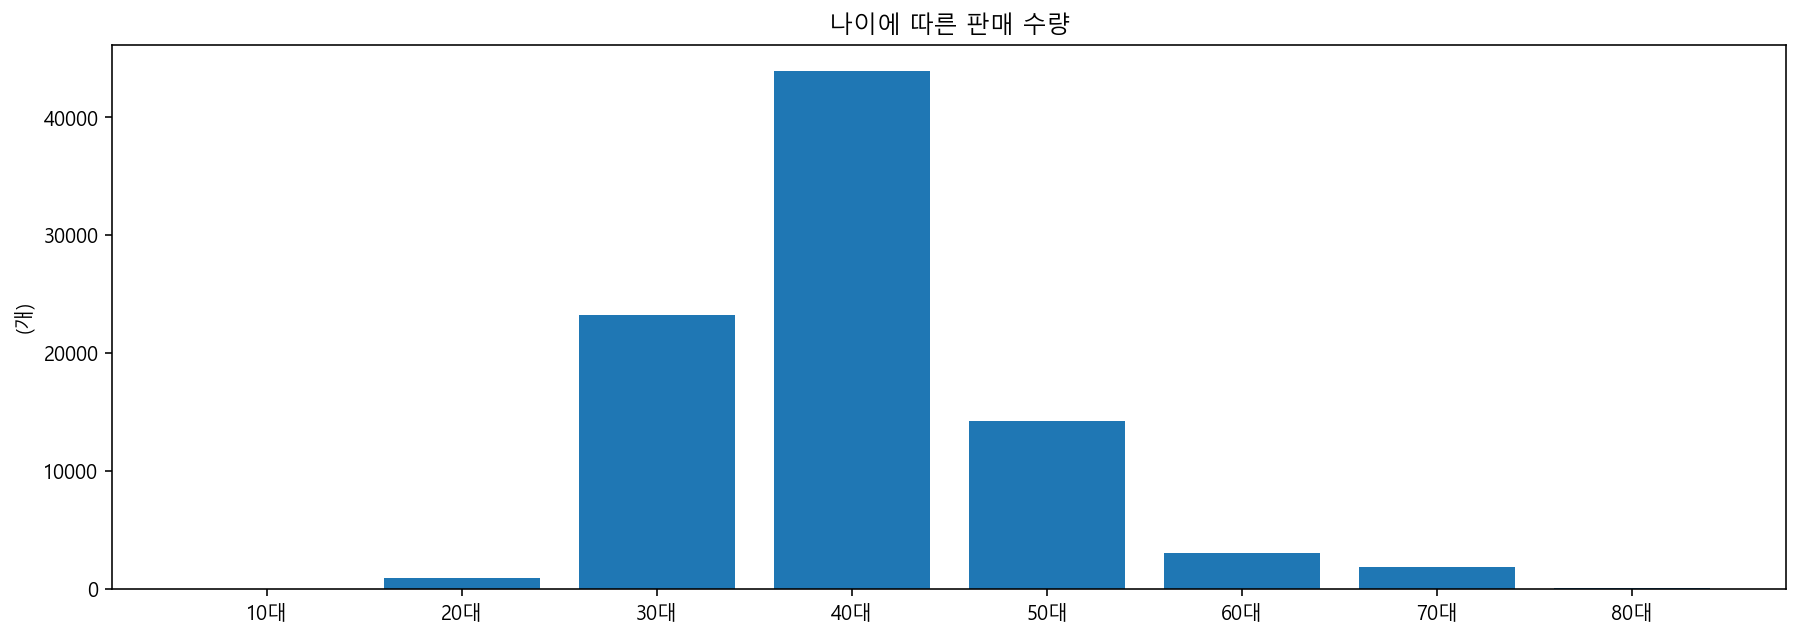

In [33]:
tmp = sales.groupby(by='Age1', as_index=False)[['Qty']].sum()
plt.figure(figsize=(15,5))
plt.title('나이에 따른 판매 수량')
plt.bar(tmp['Age1'],tmp['Qty'])
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('(개)')
plt.show()

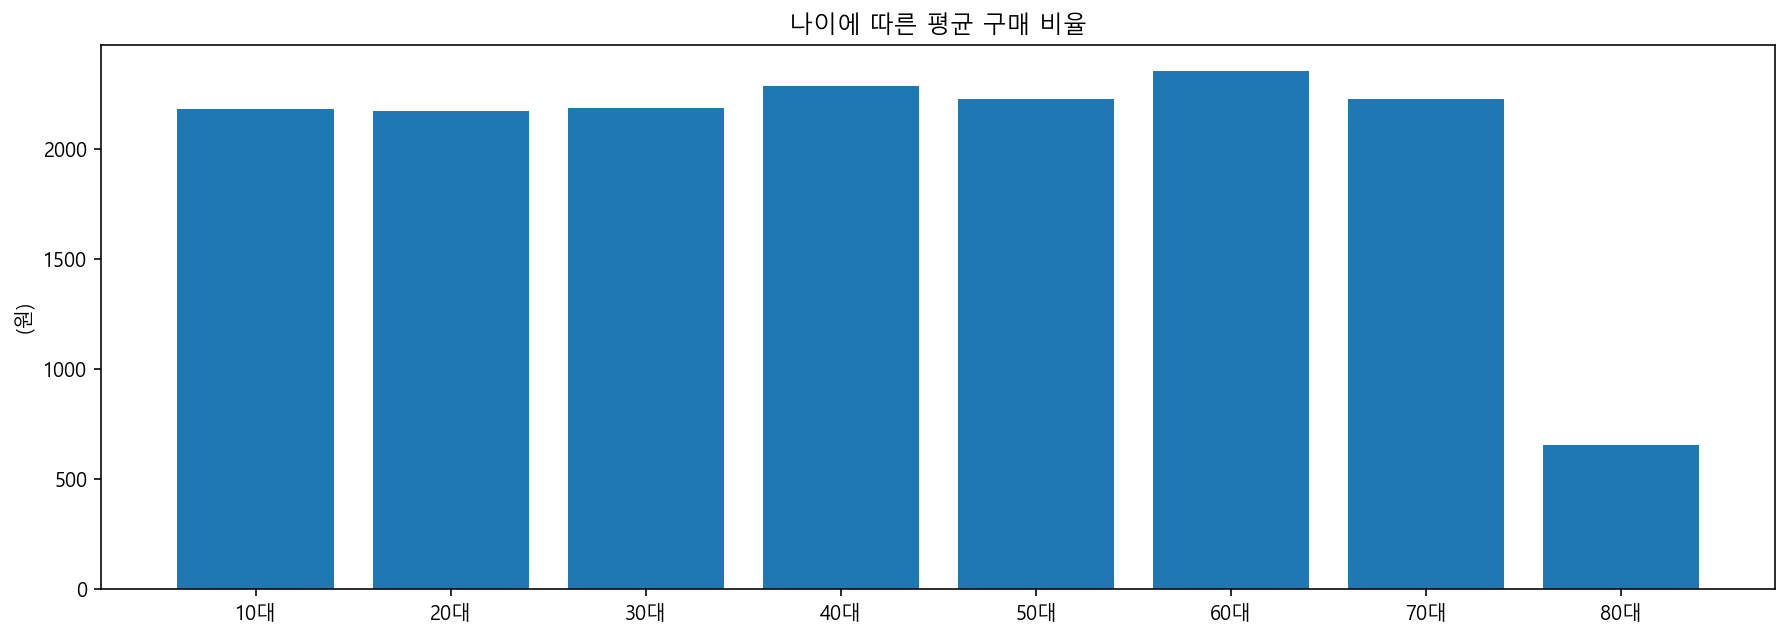

In [52]:
tmp = sales.groupby(by='Age1', as_index=False)[['Amt','Qty']].sum()
plt.figure(figsize=(15,5))
plt.title('나이에 따른 평균 구매 비율')
plt.bar(tmp['Age1'],tmp['Amt']/tmp['Qty'])
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('(원)')
plt.show()

In [27]:
bin = [-np.inf, 20, 30, 40, 50, 60, 70, 80,  np.inf]
label = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
sales['Age1'] = pd.cut(sales['Age'], bins=bin, labels=label)
sales.head()

,OrderID,Seq,Qty,Amt,CustomerID,ProductName,Category,RegisterDate,Gender,Addr1,Addr2,Age,OrderYear,OrderMonth,Price,Age1
0,1,1,2,7900,c107853,토마토,과일,2008-07-11,M,경기도,안성시,56,2016,1,3950.0,50대
1,55,1,1,1050,c107853,깻잎,채소,2008-07-11,M,경기도,안성시,56,2016,7,1050.0,50대
2,44,8,1,1050,c107853,깻잎,채소,2008-07-11,M,경기도,안성시,56,2016,9,1050.0,50대
3,36,2,1,1200,c107853,콩나물,반찬류,2008-07-11,M,경기도,안성시,56,2016,1,1200.0,50대
4,54,1,1,1300,c107853,콩나물,반찬류,2008-07-11,M,경기도,안성시,56,2016,3,1300.0,50대


## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.

In [55]:
cst = sales.groupby(by='CustomerID', as_index=False)[['Qty','Amt']].sum()
cst.head()


,CustomerID,Qty,Amt
0,c017487,127,296447
1,c017503,42,160444
2,c017517,192,317590
3,c017522,64,219849
4,c017526,26,48881


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [56]:
cst.info()
cst.value_counts()
cst.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  2237 non-null   object
 1   Qty         2237 non-null   int64 
 2   Amt         2237 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 69.9+ KB


,Qty,Amt
count,2237.000000,2.237000e+03
mean,38.988824,8.761226e+04
std,63.216430,1.401784e+05
min,1.000000,2.730000e+02
25%,4.000000,8.450000e+03
50%,13.000000,3.015000e+04
75%,47.000000,1.026730e+05
max,1008.000000,1.245250e+06


In [57]:
cst = cst.sort_values(by='Amt', ascending=False)
cst.head(10)

,CustomerID,Qty,Amt
975,c206248,613,1245250
494,c110521,356,1111062
1172,c236759,431,1084895
331,c085186,348,1080608
120,c043687,1008,1043129
438,c100815,405,1007521
1249,c261935,294,931219
122,c044231,319,903302
1771,c342774,522,881301
1452,c300788,269,845622


In [58]:
cst['Amt'].mean()

87612.2597228431

**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
- 분류 기준과 등급 이름
    -  주문건수 ~10 - member
    -  주문건수 10~50 - family
    -  주문건수 50~200 - VIP
    -  주문건수 200~500 - VVIP
    -  주문건수 500~ -MVP

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [62]:
bin = [-np.inf, 10, 50, 200, 500, np.inf]
label = ['member', 'family', 'VIP', 'VVIP', 'MVP']
cst['Level'] = pd.cut(cst['Qty'], bins=bin, labels=label)
cst.head()

,CustomerID,Qty,Amt,Level
975,c206248,613,1245250,MVP
494,c110521,356,1111062,VVIP
1172,c236759,431,1084895,VVIP
331,c085186,348,1080608,VVIP
120,c043687,1008,1043129,MVP


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [63]:
cst1 = cst.groupby(by='Level', as_index=False)[['Qty','Amt']].sum()
cst1.head()

,Level,Qty,Amt
0,member,3896,9704489
1,family,17785,39749963
2,VIP,46027,104164480
3,VVIP,17367,39200013
4,MVP,2143,3169680


## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

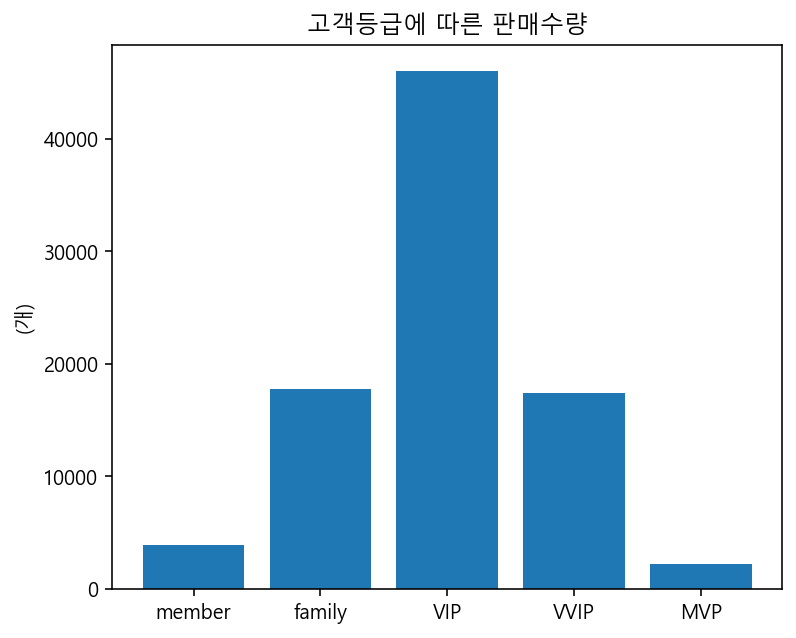

In [65]:
#고객 등급에 따른 판매수량
cst1 = cst.groupby(by='Level', as_index=False)[['Qty']].sum()
plt.figure(figsize=(6,5))
plt.title('고객등급에 따른 판매수량')
plt.bar(cst1['Level'],cst1['Qty'])
plt.ylabel('(개)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()


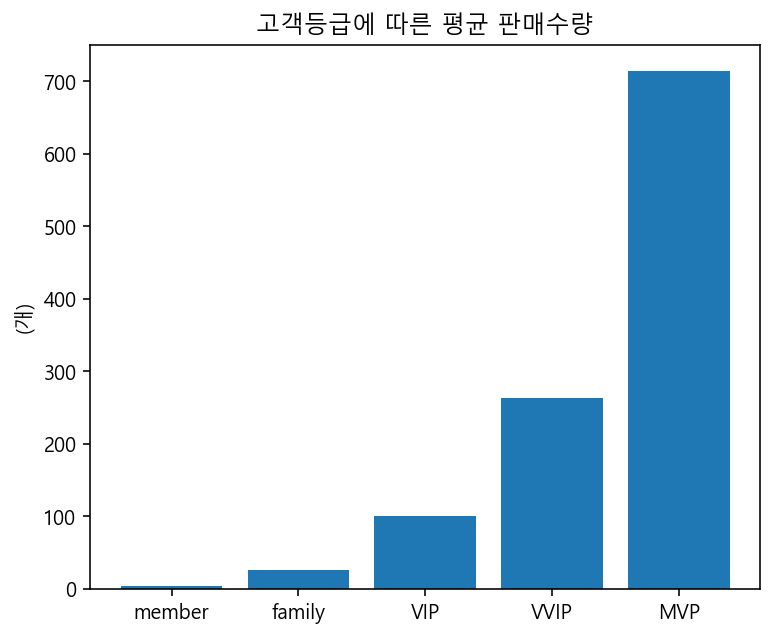

In [66]:
#고객 등급에 따른 평균 판매수량
cst1 = cst.groupby(by='Level', as_index=False)[['Qty']].mean()
plt.figure(figsize=(6,5))
plt.title('고객등급에 따른 평균 판매수량')
plt.bar(cst1['Level'],cst1['Qty'])
plt.ylabel('(개)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

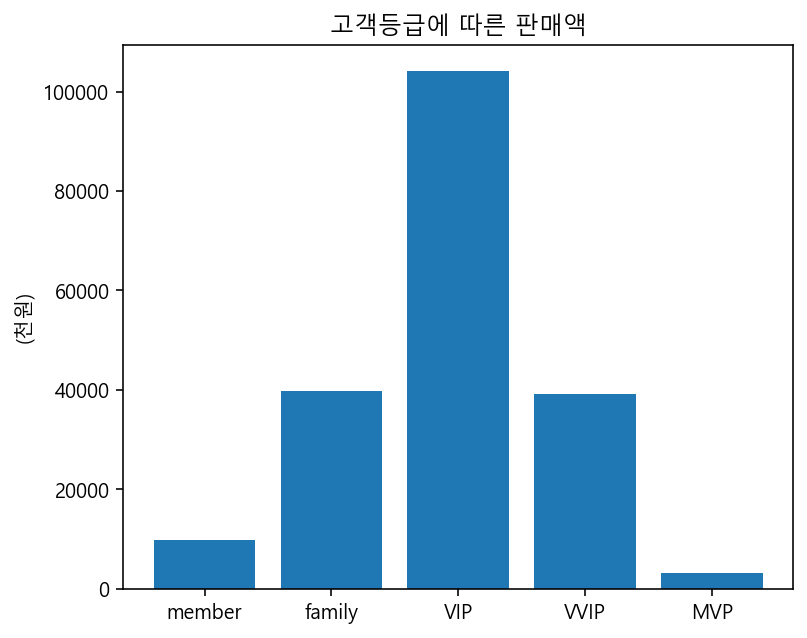

In [72]:
#고객 등급에 따른 판매액
cst1 = cst.groupby(by='Level', as_index=False)[['Amt']].sum()
plt.figure(figsize=(6,5))
plt.title('고객등급에 따른 판매액')
plt.bar(cst1['Level'],cst1['Amt']/1000)
plt.ylabel('(천원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()



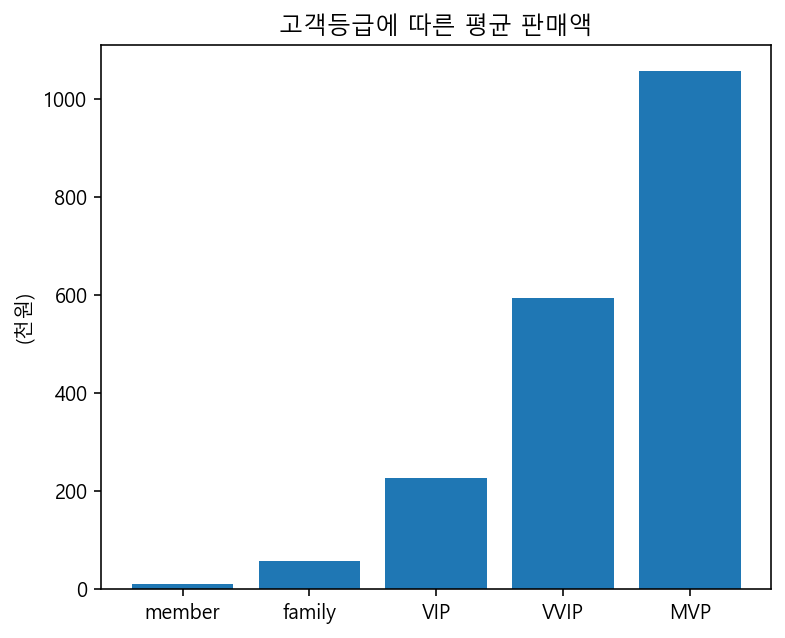

In [68]:
#고객 등급에 따른 평균 판매액
cst1 = cst.groupby(by='Level', as_index=False)[['Amt']].mean()
plt.figure(figsize=(6,5))
plt.title('고객등급에 따른 평균 판매액')
plt.bar(cst1['Level'],cst1['Amt']/1000)
plt.ylabel('(천원)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 평균적인 판매량과 판매금액을 비교하였을때 남자에게 보다 더 많이 팔린다.
- 경기도,서울,인천에서 가장 많이 판매되었으며 수도권에서 소매물품에 대한 수요가 굉장히 높다.
- 경상북도는 한번 주문시에 많은 수량의 물품을 구매하는 경향이 있다.
- 경기도 안성, 부천, 용인, 고양, 성남이 판매액 상위 5등으로 구성되어 있는것으로 보아 경기도가 대부분의 매출을 차지한다.
- 채소가 가장 많이 판매되었으며 과일이 가장 적게 판매되었으나 과일의 평균 판매액이 가장 높아 단가가 굉장히 높은것을 알 수 있다.
- 2017년의 평균 판매금액을 분석하였을때 현황이 이대로 유지된다면 16년도 보다 높은 매출을 올릴것으로 예상된다.
- 2016년 4,5,6월에 판매량이 가장 높으나 판매액은 다소 떨어지는것으로 볼때 프로모션이나 이벤트가 진행된것으로 보인다.
- 2016년 3월에 매출이 가장높게 나타났으며 판매량도 높아 이 시기에 진행되었던 프로모션을 17년도에 적용하는것이 좋아보인다.
- 주문횟수에 따라 고객등급을 선정하였고 Family등급과 VIP등급, VVIP등급이 매출의 상당부분을 차지한다.

**2) 기타**